In [63]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [64]:
def compute_delta(G):
    n = G.shape[0]
    ma = np.linalg.norm(G[0] - G[1])
    mi = np.linalg.norm(G[0] - G[1])
    for i in range(n):
        for j in range(i+1,n):
            norm = np.linalg.norm(G[i] - G[j])
            if norm > ma:
                ma = norm
            if norm < mi:
                mi = norm
    return mi, ma

def compute_relax_delta(G):
    n = G.shape[0]
    diffs = []
    for i in range(n):
        for j in range(i+1,n):
            norm = np.linalg.norm(G[i] - G[j])
            diffs.append(norm)
    diffs = np.array(diffs)
    return np.percentile(diffs, 50)

In [ ]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]

def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size):
    """
    Generate specific patterns for 5 modes.
    """
    pats = []
    temp_pats = create_specific_patterns4(mode1, mode2, mode3, mode4, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode5] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns8(mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, size):
    """
    Generate specific patterns for 8 modes.
    """
    pats = []
    temp_pats = create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode6] = bin_to_pattern(str(k))[0]
            for l in range(2):
                p_prime2 = copy.deepcopy(p_prime)
                p_prime2[mode7] = bin_to_pattern(str(l))[0]
                for m in range(2):
                    p_prime3 = copy.deepcopy(p_prime2)
                    p_prime3[mode8] = bin_to_pattern(str(m))[0]
                    pats.append(p_prime3)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

In [120]:
def create_specific_Ising_patterns(mode1,mode2,size):
    return [[1,1]]*mode1 + [[1,-1]] + [[1,1]]*(mode2-mode1-1) + [[1,-1]] + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) 

def create_specific_Ising_patterns3(mode1,mode2,mode3,size):
    temp_pats = create_specific_Ising_patterns(mode1,mode2,size)
    temp_pats[mode3] = [1,-1]
    return temp_pats

def create_specific_Ising_patterns4(mode1,mode2,mode3,mode4,size):
    temp_pats = create_specific_Ising_patterns3(mode1,mode2,mode3,size)
    temp_pats[mode4] = [1,-1]
    return temp_pats

In [235]:
n = 2**10
N = int(np.log2(n))
m = 500

M = np.random.normal(0, 1/np.sqrt(m), size=(m, n))
M_T = M.T
norms = np.linalg.norm(M_T, axis=1)
M = M_T / norms[:, np.newaxis]
G = M @ M.T

mu = np.max(G - np.identity(n))
print("coherence mu:", mu)
delta_min, delta_max = compute_delta(G)
print("delta:", delta_max)
print("Bound ", delta_max / (1 - mu))

mu_relax = np.percentile(np.abs(G - np.identity(n)), 50)
relax_delta = compute_relax_delta(G)
print("mu relax", mu_relax)
print("relax delta:", relax_delta)
print("relax bound", relax_delta / (1 - mu_relax))

print(np.argmax(G@X))

coherence mu: 0.2094798749370957
delta: 2.8550415784795886
Bound  3.6115988549341527
mu relax 0.03014460160553209
relax delta: 2.4659297942296448
relax bound 2.5425746954771093
0


In [211]:
#Custom G
# z = 100
# G = np.identity(n)
# for i in range(n):
#     rg = n - i - 1
#     if rg>0:
#         for j,k in zip ( range(i+1, n), np.arange((rg - 1)/(z*rg),-(rg - 1)/(z*rg),-1/rg) ):
#             G[i,j] = k
#     rg = i
#     if rg>0:
#         for j,k in zip ( range(0, i), np.arange(-(rg - 1)/(z*rg),(rg-1)/(z*rg),1/rg) ):
#             G[i,j] = k
G = np.ones((1024,1024)) * 0.99 + np.identity(1024) * 0.01

mu = np.max(G - np.identity(n))
print("coherence mu:", mu)
delta_min, delta_max = compute_delta(G)
print("delta_max, delta_min:", delta_max, delta_min)
print("Bound ", delta_max / (1 - mu))

coherence mu: 0.99
delta_max, delta_min: 0.014142135623730963 0.014142135623730963
Bound  1.414213562373095


In [ ]:
all_pat = []

# for i in range(N-1):
    # all_pat += create_specific_patterns(i, i+1, N)

# for i in range(N-1):
#     for j in range(i+1, N):
#         all_pat += create_specific_patterns(i, j, N)

for i in range(N-3):
    all_pat += create_specific_patterns4(i, i+1,i+2,i+3, N)

# for i in range(N-4):
#     all_pat += create_specific_patterns5(i, i+1,i+2,i+3,i+4, N)

M = np.array([dev_pattern(p) for p in all_pat])
m = M.shape[0]
print(f"Number of patterns: {m}")

M_T = M.T
norms = np.linalg.norm(M_T, axis=1)
M = M_T / norms[:, np.newaxis]
G = M @ M.T

mu = np.max(G - np.identity(n))
print("coherence mu:", mu)
delta_min, delta_max = compute_delta(G)
print("delta_max, delta_min:", delta_max, delta_min)
print("Bound ", delta_max / (1 - mu))

# mu_relax = np.percentile(np.abs(G - np.identity(n)), 50)
# relax_delta = compute_relax_delta(G)
# print("mu relax", mu_relax)
# print("relax delta:", relax_delta)
# print("relax bound", relax_delta / (1 - mu_relax))

# print(np.argmax(G@X))

Number of patterns: 112
coherence mu: 0.8571428571428569
delta_max, delta_min: 6.565214453186318 1.6162440712835369
Bound  45.95650117230414
mu relax 0.0
relax delta: 6.3631592718057375
relax bound 6.3631592718057375
0


0.4285744069881008
0.3998719666468947
1.0717790761425185
0


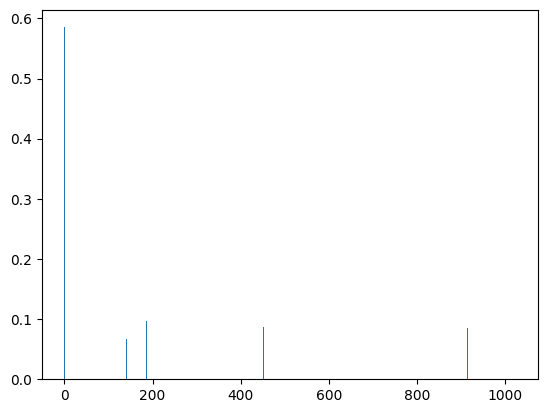

In [238]:
# X = np.random.uniform(0, 100, size=(n, 1))
X = np.random.exponential(scale=3.0, size=(n, 1))
X[0]+= 100
X = X / np.linalg.norm(X)
X[ X < np.percentile(X, 98)] = 0

i,j = np.argsort(X.flatten())[-2:][::-1]
Delta = X[i,0] - X[j,0]
# print( Delta / (1 - X[i,0]**2))

v = copy.deepcopy(X)
v[i,0] = 0
v[j,0] = 0
print(Delta)
print(np.linalg.norm(v))
print( Delta / np.linalg.norm(v))

print(i)

plt.bar(range(n), X.flatten())
plt.show()

In [55]:
def estimate_cost(sequence, rules, rewards, starting_positions=None):
    """
    Estimate the cost of a sequence based on the rules, rewards, and starting positions.
    """
    if rules== [] or rewards == []:
        return 0

    if starting_positions is None:
        starting_positions = [list(range(len(sequence) - len(rules[0]) + 1))] * len(rules)

    reward = 0
    rule_length = len(rules[0])

    for rule, rule_reward, positions in zip(rules, rewards, starting_positions):
        for k in positions:  # Only check the specified starting positions
            if k + rule_length <= len(sequence) and np.all(sequence[k:k + rule_length] == rule):
                reward += rule_reward
                
    return np.abs(reward)

sequence_list = np.array([np.array(list(bin(i)[3:]),dtype=np.int32) for i in range(2**N, 2**(N+1))])
def generate_problem():

    rules1 = [(0,0,1), (0,1,1)]
    rules2 = [(1,0,1,0),(1,1,1,1)]
    rules3 = [(0,1)]

    sequence_cost = []
    for sequence in sequence_list:
        rew = 0
        rew += estimate_cost(sequence,rules1, [1])
        rew += estimate_cost(sequence,rules2, [1])
        rew += estimate_cost(sequence,rules3, [1])
        sequence_cost.append(rew)
    sequence_cost = np.array(sequence_cost)
    sequence_cost = sequence_cost /np.linalg.norm(sequence_cost)

    return sequence_cost

sequence_cost = generate_problem()


0.0
0.0
682


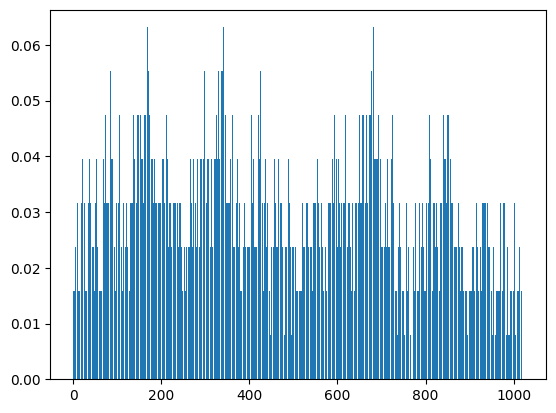

In [53]:
X = copy.deepcopy(sequence_cost.reshape(-1,1))

i,j = np.argsort(X.flatten())[-2:][::-1]
Delta = X[i,0] - X[j,0]
print( Delta / (1 - X[i,0]**2))

v = copy.deepcopy(X)
v[i,0] = 0
v[j,0] = 0
print( Delta / np.linalg.norm(v))

print(i)

plt.bar(range(n), X.flatten())
plt.show()